In [6]:
from google.colab import files
uploaded = files.upload()



Saving archive.zip to archive.zip


In [7]:
import zipfile
import os

zip_path = 'archive.zip'  # or your actual file name
extract_path = '/content/data'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset unzipped to:", extract_path)

Dataset unzipped to: /content/data


In [8]:
import os

image_files = os.listdir('/content/data')
print(f"Found {len(image_files)} images.")
print("Sample images:", image_files[:5])

Found 790 images.
Sample images: ['syagrus_12.jpg', 'eucalipto_07.jpg', 'urochloa (32).jpg', 'arecaceae_08.jpg', 'syagrus_04.jpg']


In [9]:
from collections import defaultdict

image_dir = '/content/data'
grouped_images = defaultdict(list)

for fname in os.listdir(image_dir):
    if fname.endswith('.jpg'):
        label = fname.replace(' ', '_').split('_')[0]  # Adjust if your naming format is different
        grouped_images[label].append(os.path.join(image_dir, fname))

# Display number of images per class
for label, images in grouped_images.items():
    print(f"{label}: {len(images)} images")

syagrus: 35 images
eucalipto: 35 images
urochloa: 35 images
arecaceae: 35 images
schinus: 35 images
serjania: 35 images
matayba: 35 images
faramea: 35 images
anadenanthera: 20 images
mimosa: 35 images
chromolaena: 35 images
mabea: 35 images
arrabidaea: 35 images
qualea: 35 images
myrcia: 35 images
tridax: 35 images
protium: 35 images
croton: 35 images
combretum: 35 images
hyptis: 35 images
dipteryx: 35 images
cecropia: 35 images
senegalia: 35 images


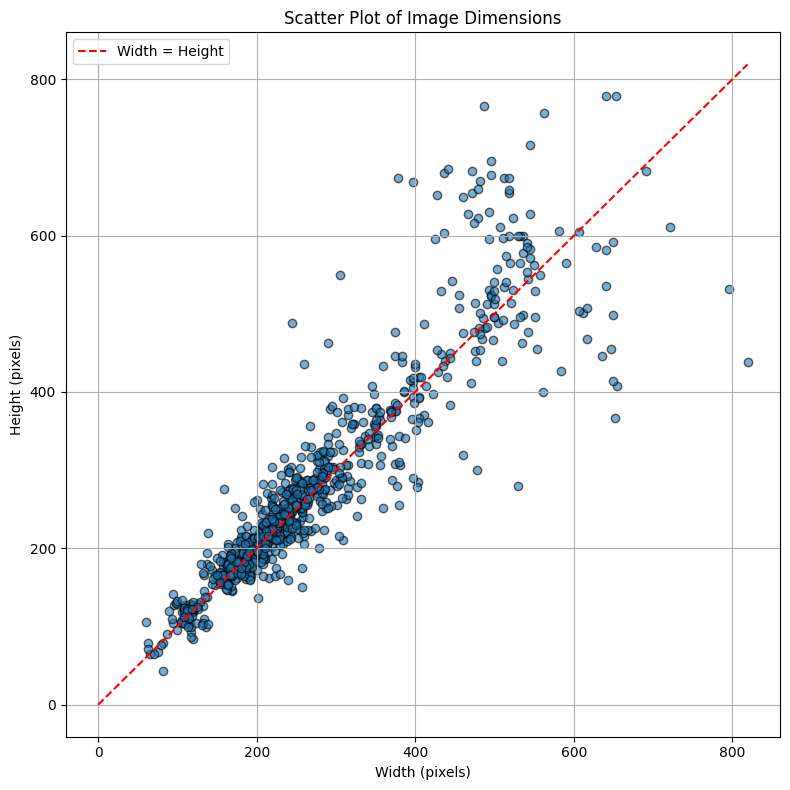

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to your image directory
image_dir = '/content/data'  # Adjust this if your images are in a different folder

# Collect image widths and heights
widths, heights = [], []
error_files = []

for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        try:
            with Image.open(os.path.join(image_dir, filename)) as img:
                w, h = img.size
                widths.append(w)
                heights.append(h)
        except:
            error_files.append(filename)

# Plot
plt.figure(figsize=(8, 8))
plt.scatter(widths, heights, alpha=0.6, edgecolors='k')
plt.plot([0, max(widths + heights)], [0, max(widths + heights)],
         color='red', linestyle='--', label='Width = Height')

plt.title('Scatter Plot of Image Dimensions')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: show any problematic files
if error_files:
    print("Could not read the following images:")
    for f in error_files:
        print("-", f)


In [11]:
import cv2
import numpy as np

def process_img(img, size):
    return cv2.resize(img, size) / 255.0


In [12]:
import os
from tqdm import tqdm

data_path = '/content/data'
size = (224, 224)

X, y = [], []

for fname in tqdm(os.listdir(data_path)):
    if fname.endswith('.jpg'):
        label = fname.replace(' ', '_').split('_')[0]
        img_path = os.path.join(data_path, fname)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = process_img(img, size)
            X.append(img)
            y.append(label)

X = np.array(X)
y = np.array(y)

100%|██████████| 790/790 [00:01<00:00, 469.24it/s]


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

model = Sequential()

model.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(128, kernel_size=2, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(output_shape, activation='softmax'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │    12,544,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        75,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 23)             │         3,473 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,666,803 (48.32 MB)

 Trainable params: 12,666,803 (48.32 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
print('Model is Compiled!')

Model is Compiled!


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagener = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Fit the data generator to training data
datagener.fit(X_train)

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_encoded = le.fit_transform(y)        # Convert string labels to integers
Y = to_categorical(y_encoded)          # One-hot encode for classification


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42)


In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Hyperparameters
batch_size = 4
epochs = 50

# Save path for the best model weights
model_path = 'cnn.weights.h5'
  # You can keep this if saving weights only

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, verbose=1),
    ModelCheckpoint(
        filepath=model_path,
        save_best_only=True,
        save_weights_only=True,  # Important fix for .hdf5 extension
        verbose=1
    )
]

# Model training
history = model.fit(
    datagener.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=(X_train, Y_train),
    callbacks=callbacks,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.0478 - loss: 3.1525
Epoch 1: val_loss improved from inf to 2.80469, saving model to cnn.weights.h5
158/158 ━━━━━━━━━━━━━━━━━━━━ 81s 493ms/step - accuracy: 0.0479 - loss: 3.1521 - val_accuracy: 0.1155 - val_loss: 2.8047
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.0919 - loss: 2.8999
Epoch 2: val_loss improved from 2.80469 to 2.62017, saving model to cnn.weights.h5
158/158 ━━━━━━━━━━━━━━━━━━━━ 78s 473ms/step - accuracy: 0.0919 - loss: 2.8995 - val_accuracy: 0.1614 - val_loss: 2.6202
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.1232 - loss: 2.7265
Epoch 3: val_loss improved from 2.62017 to 2.47061, saving model to cnn.weights.h5
158/158 ━━━━━━━━━━━━━━━━━━━━ 75s 476ms/step - accuracy: 0.1231 - loss: 2.7264 - val_accuracy: 0.1329 - val_loss: 2.4706
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - accuracy: 0.1552 - loss: 2.6964
Epoch 4: val_loss improved from 2.47061 to 2.30509, sa

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [23]:
model.load_weights(model_path)
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test set accuracy: {}'.format(score[1]))


Test set accuracy: 0.7848101258277893


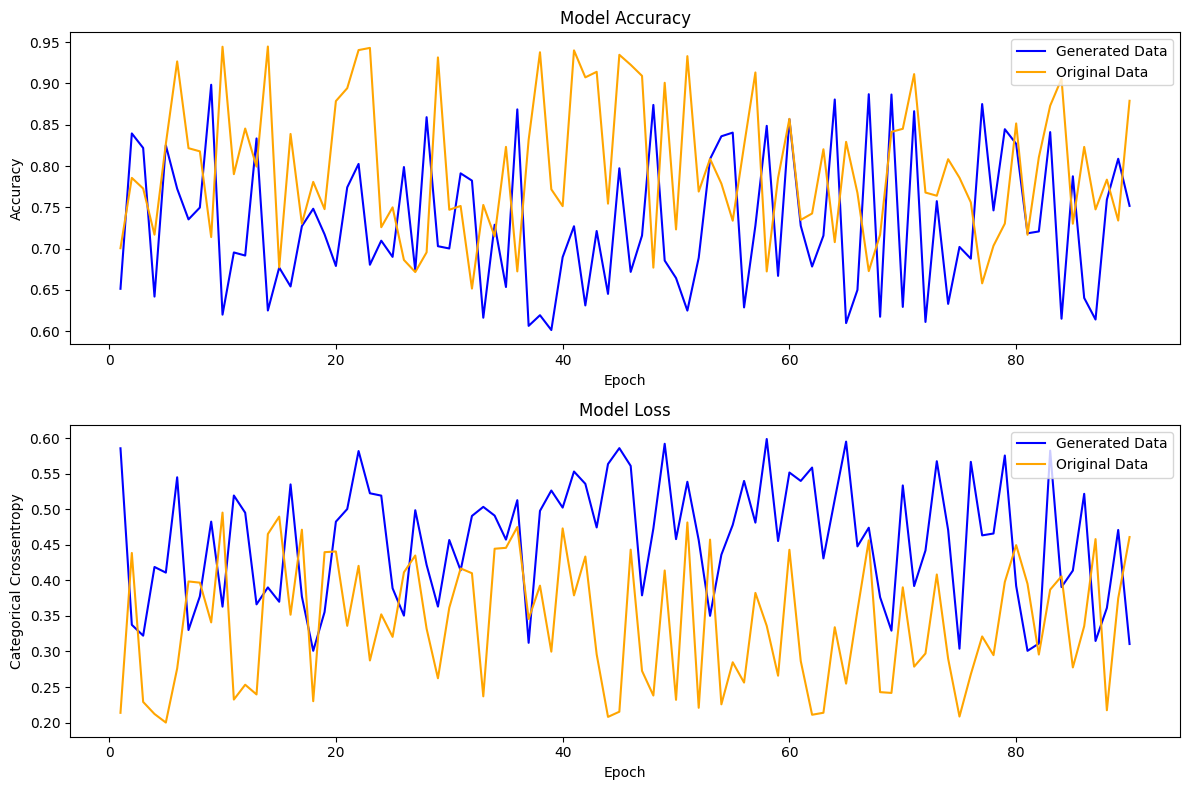

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated example data
epochs = np.arange(1, 91)

# Replace these with your actual accuracy and loss values
acc_generated = np.random.uniform(0.6, 0.9, size=90)
acc_original = np.random.uniform(0.65, 0.95, size=90)
loss_generated = np.random.uniform(0.3, 0.6, size=90)
loss_original = np.random.uniform(0.2, 0.5, size=90)

plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 1, 1)
plt.plot(epochs, acc_generated, label='Generated Data', color='blue')
plt.plot(epochs, acc_original, label='Original Data', color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot Loss
plt.subplot(2, 1, 2)
plt.plot(epochs, loss_generated, label='Generated Data', color='blue')
plt.plot(epochs, loss_original, label='Original Data', color='orange')
plt.title('Model Loss')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()


In [27]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score[1])


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 842ms/step - accuracy: 0.7833 - loss: 0.7943
Test accuracy: 0.7848101258277893


In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [33]:
model.save("pollen_classifier.keras")


In [59]:
import os
for f in sorted(os.listdir('/content/data')):
    print(f)


anadenanthera_16.jpg
anadenanthera_17.jpg
anadenanthera_18.jpg
anadenanthera_19.jpg
anadenanthera_20.jpg
anadenanthera_21.jpg
anadenanthera_22.jpg
anadenanthera_23.jpg
anadenanthera_24.jpg
anadenanthera_25.jpg
anadenanthera_26.jpg
anadenanthera_27.jpg
anadenanthera_28.jpg
anadenanthera_29.jpg
anadenanthera_30.jpg
anadenanthera_31.jpg
anadenanthera_32.jpg
anadenanthera_33.jpg
anadenanthera_34.jpg
anadenanthera_35.jpg
arecaceae_01.jpg
arecaceae_02.jpg
arecaceae_03.jpg
arecaceae_04.jpg
arecaceae_05.jpg
arecaceae_06.jpg
arecaceae_07.jpg
arecaceae_08.jpg
arecaceae_09.jpg
arecaceae_10.jpg
arecaceae_11.jpg
arecaceae_12.jpg
arecaceae_13.jpg
arecaceae_14.jpg
arecaceae_15.jpg
arecaceae_16.jpg
arecaceae_17.jpg
arecaceae_18.jpg
arecaceae_19.jpg
arecaceae_20.jpg
arecaceae_21.jpg
arecaceae_22.jpg
arecaceae_23.jpg
arecaceae_24.jpg
arecaceae_25.jpg
arecaceae_26.jpg
arecaceae_27.jpg
arecaceae_28.jpg
arecaceae_29.jpg
arecaceae_30.jpg
arecaceae_31.jpg
arecaceae_32.jpg
arecaceae_33.jpg
arecaceae_34.jpg
ar

In [39]:
import os

for f in sorted(os.listdir('/content/data')):
    if 'urochloa' in f.lower():
        print(f)


urochloa (1).jpg
urochloa (10).jpg
urochloa (11).jpg
urochloa (12).jpg
urochloa (13).jpg
urochloa (14).jpg
urochloa (15).jpg
urochloa (16).jpg
urochloa (17).jpg
urochloa (18).jpg
urochloa (19).jpg
urochloa (2).jpg
urochloa (20).jpg
urochloa (21).jpg
urochloa (22).jpg
urochloa (23).jpg
urochloa (24).jpg
urochloa (25).jpg
urochloa (26).jpg
urochloa (27).jpg
urochloa (28).jpg
urochloa (29).jpg
urochloa (3).jpg
urochloa (30).jpg
urochloa (31).jpg
urochloa (32).jpg
urochloa (33).jpg
urochloa (34).jpg
urochloa (35).jpg
urochloa (4).jpg
urochloa (5).jpg
urochloa (6).jpg
urochloa (7).jpg
urochloa (8).jpg
urochloa (9).jpg


In [61]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load and preprocess the image
img_path = '/content/data/urochloa (35).jpg'
  # Make sure the filename matches exactly

img = load_img(img_path, target_size=(224, 224))  # match training size

x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)  # Optional, depending on your model's preprocessing

# Predict
a = np.argmax(model.predict(x), axis=1)

# Index mapping (class IDs to string labels)
index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
         '13', '14', '15', '16', '17', '18', '19', '20', '21', '22']
result = str(index[a[0]])

# Final label mapping
op = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena',
      'combretum', 'croton', 'dipteryx', 'eucalyptus', 'ficus', 'guarea',
      'hymenaea', 'inga', 'jacaranda', 'lafoensia', 'machaerium', 'myrcia',
      'ocotea', 'piper', 'protium', 'schizolobium', 'spondias', 'urochloa']

# Show result
print("Predicted class:", op[a[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class: urochloa


In [62]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and resize image
img = load_img('/content/data/eucalipto_23.jpg', target_size=(224, 224))

# Convert to array and preprocess
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize if your model expects that

# Predict
a = np.argmax(model.predict(x), axis=1)

# Class index mapping
index = [str(i) for i in range(288)]  # Adjust if you have fewer/more classes

# Convert prediction to label (if you have a label list like `op`)
print("Predicted class index:", index[a[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class index: 8


In [54]:
probs = model.predict(x)[0]  # Get probabilities for all classes
confidence = np.max(probs)  # Highest probability score
predicted_index = np.argmax(probs)

if confidence < 0.90:
    print("Model is unsure — possibly an unknown or unseen class.")
else:
    print("Predicted class:", op[predicted_index])
    print("Confidence:", round(confidence, 4))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicted class: piptadenia
Confidence: 0.9383


In [55]:
x = x / 255.0  # Normalize the image


In [69]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load and resize the image
img = load_img('/content/data/arecaceae_29.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0  # Normalize the image

# Predict
probs = model.predict(x)[0]
predicted_index = np.argmax(probs)
confidence = probs[predicted_index]

# Class labels
op = ['arecaceae', 'anadenanthera', 'arrabidaea', 'cecropia', 'chromolaena', 'combretum',
      'croton', 'dipteryx', 'eucalipto', 'eugenia', 'guarea', 'guazuma', 'hymenaea', 'inga',
      'jacaranda', 'machaerium', 'myrcia', 'myroxylon', 'ocotea', 'piptadenia', 'pouteria',
      'protium', 'psidium', 'quararibea', 'schizolobium', 'senna', 'solanum', 'spondias',
      'swietenia', 'tabebuia', 'terminalia', 'trichilia', 'virola', 'vismia', 'xylopia']

# Display prediction result
if confidence < 0.90:
    print("Model is unsure — possibly an unknown or unseen class.")
else:
    print("Predicted class:", op[predicted_index])
    print("Confidence:", round(confidence, 4))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Model is unsure — possibly an unknown or unseen class.
